# composite_moisture_JJA

In [1]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        sx=14 ; sy=60 # 77°18′59″S 39°42′04″E
        df_lat = -77.3 ; df_lon=39.66
        
        return df_lon, df_lat, sx, sy

In [4]:
df_lon,df_lat,df_x,df_y = Site().DomeF()    

In [5]:
class draw_map:
    def label_h(self,fig,ax,barplot,cs,levels,label,fontsize):
        cbaCorrax = fig.add_axes(barplot)
        cbar      = plt.colorbar(cs, cax=cbaCorrax,orientation='horizontal',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)

In [6]:
class draw_Ant:
    def raw(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24,alpha=1):
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, alpha=alpha,
                             transform=ccrs.PlateCarree(), extend = "both")
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
 
        return cs

    def cont(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24):
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contour( x, y, var0, 
                             colors="darkgray",levels=levels,linewidth=5,
                             transform=ccrs.PlateCarree(),extend = "both")
        cs = ax.contourf(x, y, var0, 
                             colors="gray", levels=[0,100], linewidth=8,hatches=[None, '/'],alpha=0.3,
                             transform=ccrs.PlateCarree(),extend = "low")
        df_lon, df_lat,sx,sy = Site().DomeF()
        ax.scatter(df_lon,df_lat,c="black", s=600, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
        
        return cs
    
    def circle(self):
        theta          = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts          = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle         = mpath.Path(verts * radius + center)
        
        return circle 

In [7]:
def Color_Set(levels, cmapname):
    cmap       = plt.get_cmap(cmapname, len(levels)+1)
    colors     = cmap(range(cmap.N))
    cmap, norm = mc.from_levels_and_colors(levels,colors,extend="both")
    
    return cmap, norm     

In [8]:
def get_color_code(cname,num):
    cmap = cm.get_cmap(cname,num)

    code_list =[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
        code_list.append(rgb2hex(rgb))

    return code_list

In [9]:
loadfile  = "vprecw.npz"
dataset   = np.load(loadfile)
vprecw    = dataset["vprecw"]
lon2      = dataset["lon2"]
lat2      = dataset["lat2"]
y         = dataset["y"]
m         = dataset["m"]
d         = dataset["d"]

In [10]:
loadfile = "precw.npz"
dataset  = np.load(loadfile)
precw    = dataset["precw"]

In [11]:
loadfile   = "precw_d18O.npz"
dataset    = np.load(loadfile)
precw_d18O = dataset["precw_d18O"]

## $\mathsf{\delta ^+} - \mathsf{\delta^-}$

In [12]:
loadfile   = "prcp_d18O_index.npz"
dataset    = np.load(loadfile)
d18O_index = dataset["index"]

In [13]:
thres=1

In [14]:
m_p = m[d18O_index>=   thres]
m_m = m[d18O_index<=-1*thres]

vprecw_p     = vprecw    [:,:,d18O_index>=   thres]
vprecw_m     = vprecw    [:,:,d18O_index<=-1*thres]
precw_p      = precw     [:,:,d18O_index>=   thres]
precw_m      = precw     [:,:,d18O_index<=-1*thres]
precw_d18O_p = precw_d18O[:,:,d18O_index>=   thres]
precw_d18O_m = precw_d18O[:,:,d18O_index<=-1*thres]

vprecwJJA_p = np.nanmean(vprecw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
vprecwJJA_m = np.nanmean(vprecw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)
precwJJA_p  = np.nanmean(precw_p [:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
precwJJA_m  = np.nanmean(precw_m [:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

precw_d18OJJA_p = np.nanmean(precw_d18O_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))]
                             *precw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)/precwJJA_p
precw_d18OJJA_m = np.nanmean(precw_d18O_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))]
                             *precw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)/precwJJA_m

## $\mathsf{SAM^-} - \mathsf{SAM^+}$

In [15]:
loadfile = "sam.npz"
dataset  = np.load(loadfile)
sam      = dataset["sam"]

In [16]:
thres_sam=1

In [17]:
m_sam_p = m[sam>=   thres_sam]
m_sam_m = m[sam<=-1*thres_sam]

vprecw_sam_p     = vprecw    [:,:,sam>=   thres_sam]
vprecw_sam_m     = vprecw    [:,:,sam<=-1*thres_sam]
precw_sam_p      = precw     [:,:,sam>=   thres_sam]
precw_sam_m      = precw     [:,:,sam<=-1*thres_sam]
precw_d18O_sam_p = precw_d18O[:,:,sam>=   thres_sam]
precw_d18O_sam_m = precw_d18O[:,:,sam<=-1*thres_sam]

vprecwJJA_sam_p = np.nanmean(vprecw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)
vprecwJJA_sam_m = np.nanmean(vprecw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)
precwJJA_sam_p  = np.nanmean(precw_sam_p [:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)
precwJJA_sam_m  = np.nanmean(precw_sam_m [:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)

precw_d18OJJA_sam_p = np.nanmean(precw_d18O_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))]
                             *precw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)/precwJJA_sam_p
precw_d18OJJA_sam_m = np.nanmean(precw_d18O_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))]
                             *precw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)/precwJJA_sam_m

## Plot figures

In [18]:
vq_levels            = [-3,-2,-1,-0.5,-0.1,0.1,0.5,1,2,3]
vq_cmapname          = "coolwarm"
vq_cmap, vq_norm     = Color_Set(vq_levels, vq_cmapname)
vq_label             = "Meridional Q-Flux Anomaly [g/kg $\mathsf{\cdot}$ m/s]"

color_code           = (get_color_code(vq_cmapname,len(vq_levels)+1)[:]) # modification
mid                  = (len(color_code)-1)/2
color_code[int(mid)] = "#ffffff"

vq_cmap, vq_norm     = mc.from_levels_and_colors(vq_levels,color_code,extend="both")

In [19]:
vprecw_levels            = [-50,-45,-40,-35,-30, -25,-20,-15, -10, -5,0,5,  10, 15,20,25,30,35,40,45,50]
vprecw_cmapname          = "Greys_r"
vprecw_cmap, vprecw_norm = Color_Set(vprecw_levels, vprecw_cmapname)
vprecw_label             = "Vertically Intergrated Meridional Moisture Flux Anomaly\n[g/kg $\mathsf{\cdot}$ m/s]"

In [20]:
d18O_levels          = [-30,-20,-15,-10,-4,-2,-1,-0.5,0.5,1,2,4,10,15,20,30]
d18O_cmapname        = "bwr"
d18O_cmap, d18O_norm = Color_Set(d18O_levels, d18O_cmapname)
d18O_label           = "Vertically Integrated $\mathsf{\delta^{18}O}_v$ Anomaly [\u2030]"

color_code           = (get_color_code(d18O_cmapname,len(d18O_levels)+1)[:]) # modification
mid                  = (len(color_code)-1)/2
color_code[int(mid)] = "#ffffff"
color_code           = color_code[3:]
d18O_levels          = d18O_levels[3:]

d18O_cmap, d18O_norm = mc.from_levels_and_colors(d18O_levels,color_code,extend="both")

In [24]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def draw_field2(ax, var1, var2, title="", 
                label1="",levels1=levels, cmap1=cmap, norm1=norm,
                label2="",levels2=levels, cmap2=cmap, norm2=norm, 
                dome_lat=df_lat, dome_name="DF", area=[-180, 180, -90, -20]):
    
    barplot=[0.05, 0.05, 0.9, 0.05]
    
    cs  = draw_Ant().raw( ax,area,title,lon2,lat2,var1,norm1,cmap1,levels1)
    cs2 = draw_Ant().cont(ax,area,title,lon2,lat2,var2,norm2,cmap2,levels2)
    
    draw_map().label_h(fig,ax,barplot, cs,levels1,label1,24)
                
    return ax

In [25]:
label_sam_p = "$\mathsf{SAM^+}$"
label_sam_m = "$\mathsf{SAM^-}$"
label_n     = "$\mathsf{\delta^-}$"
label_p     = "$\mathsf{\delta^+}$"

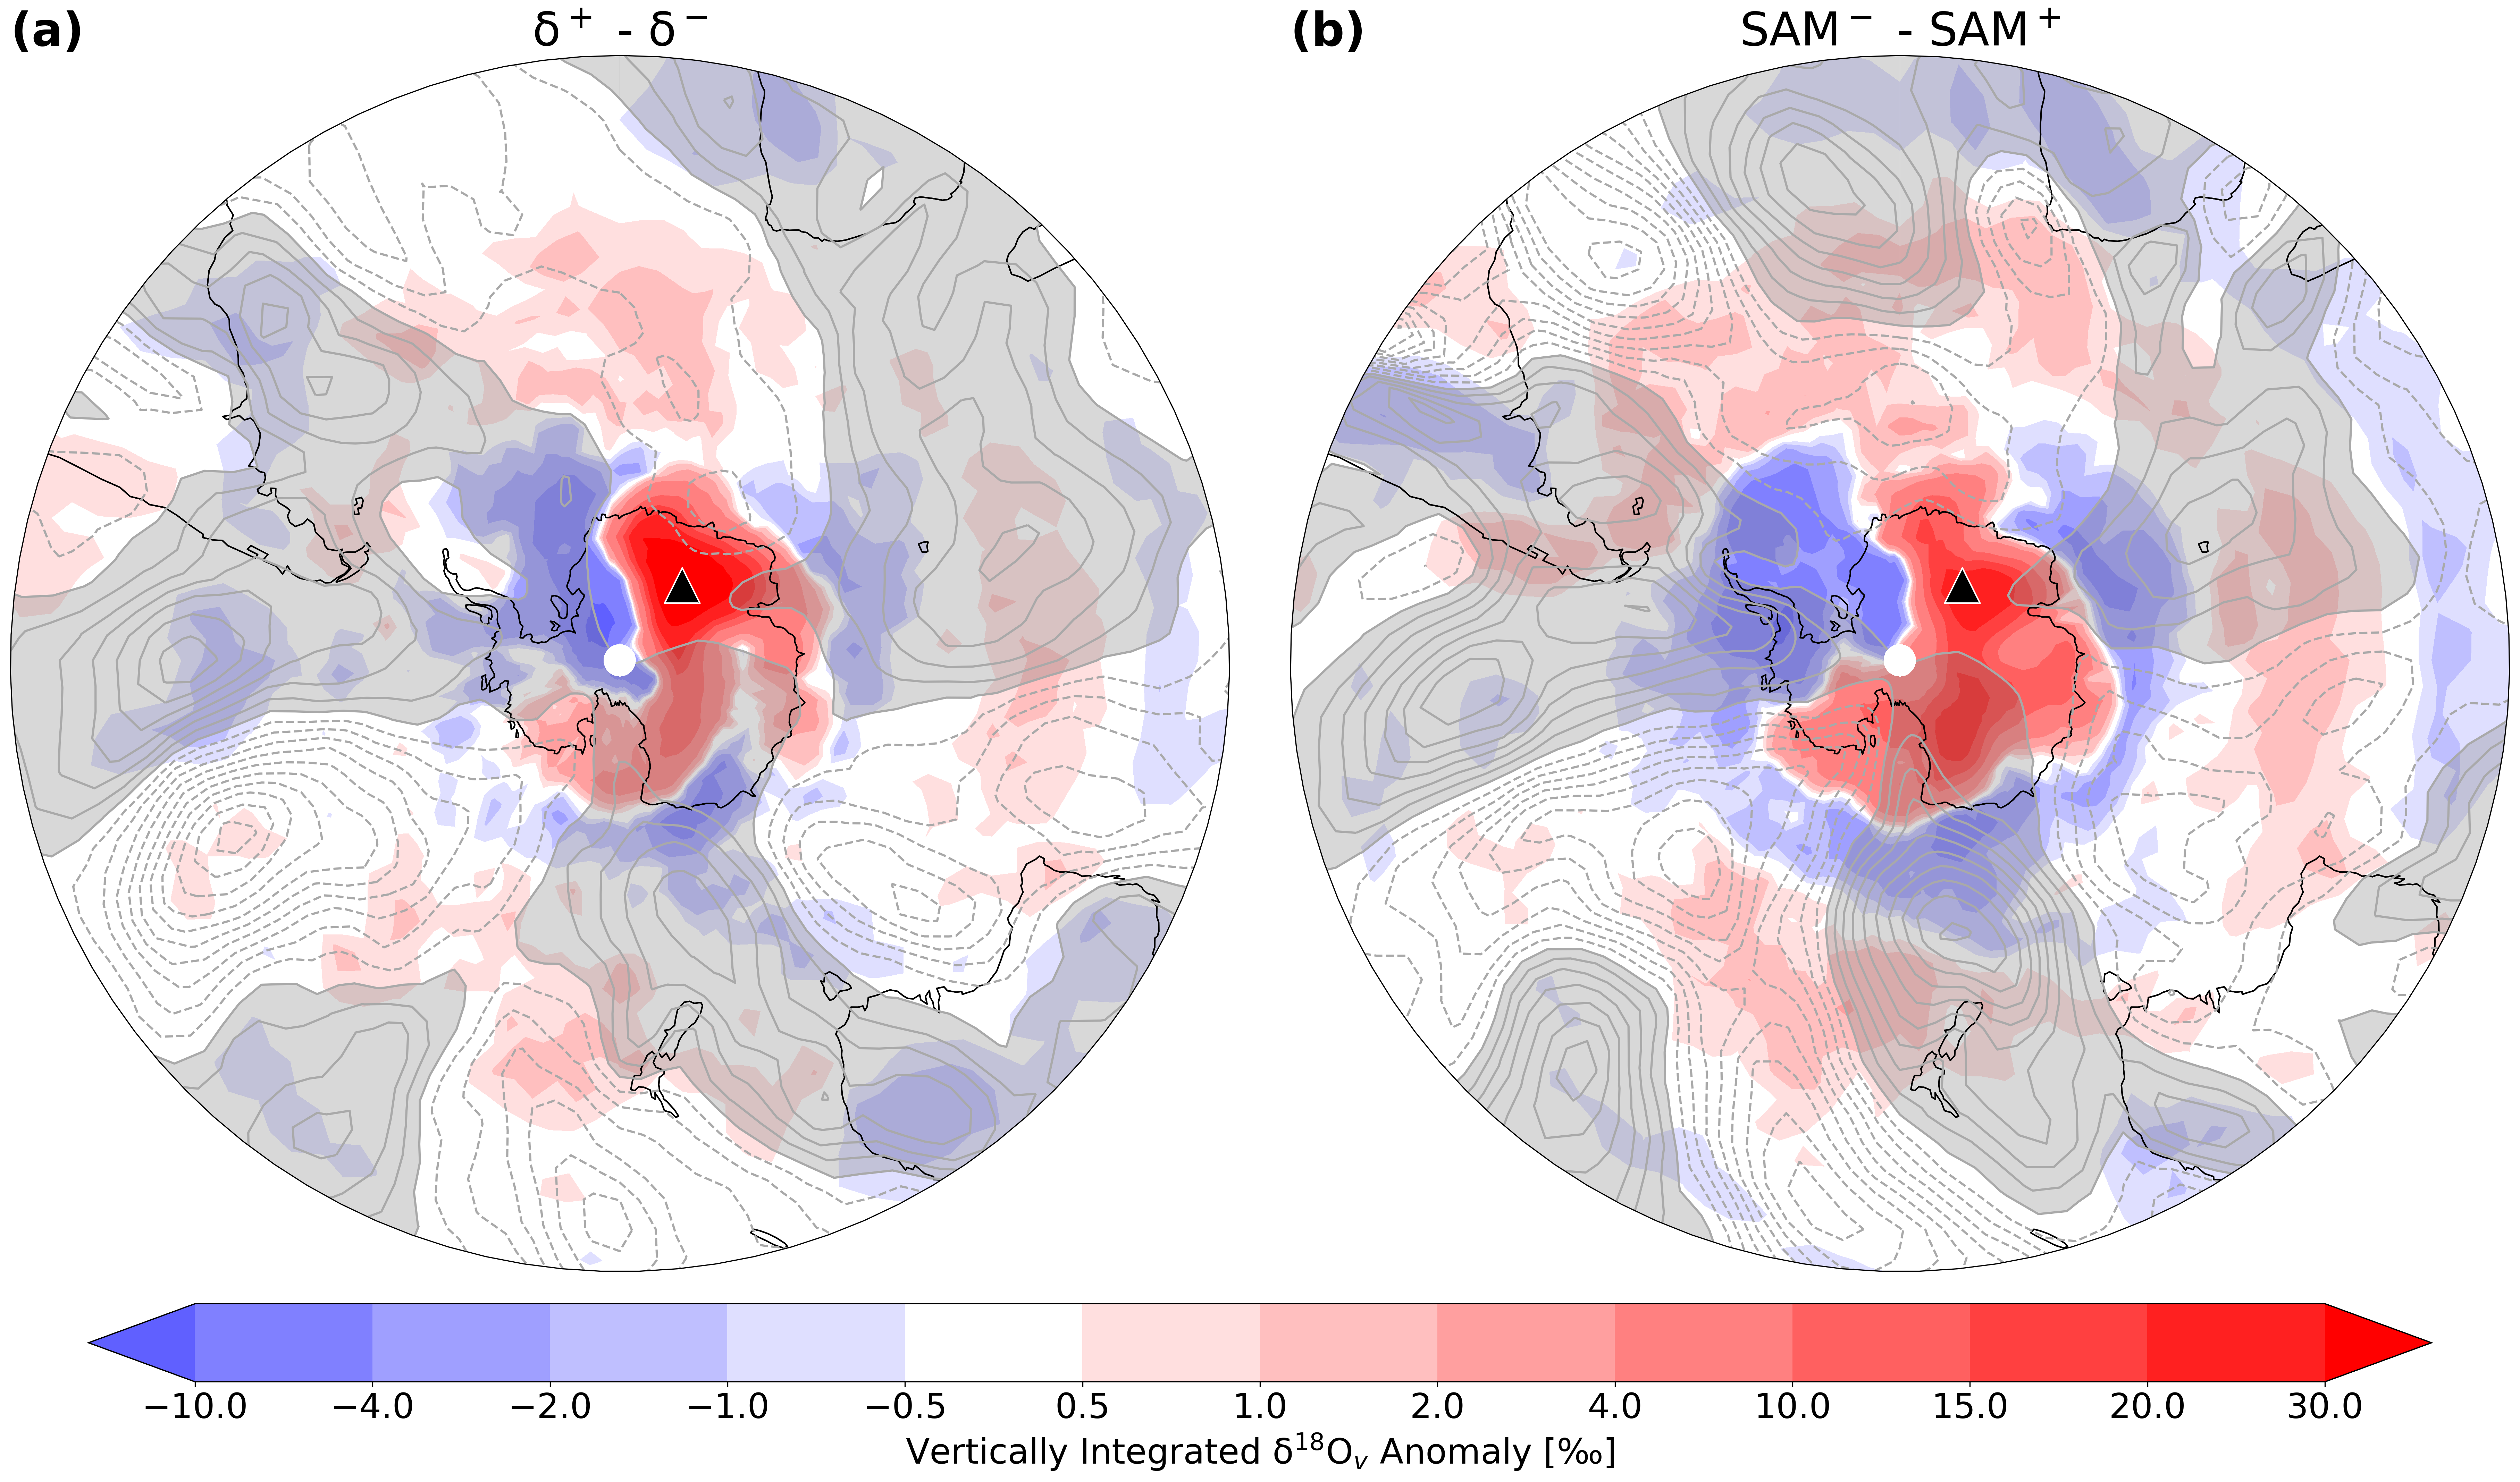

In [26]:
fig = plt.figure(figsize=(25,15))

ax = plt.subplot2grid((1,2), (0, 0), projection=ccrs.SouthPolarStereo())
draw_field2(ax, precw_d18OJJA_p-precw_d18OJJA_m,vprecwJJA_p-vprecwJJA_m,
            label1=d18O_label  , levels1=d18O_levels  , cmap1=d18O_cmap  , norm1=d18O_norm,
            label2=vprecw_label, levels2=vprecw_levels, cmap2=vprecw_cmap, norm2=vprecw_norm
            )
ax.set_title("(a)", loc="left", fontsize=32, weight="demibold")
ax.set_title(label_p+" - "+label_n, loc="center", fontsize=32)

ax = plt.subplot2grid((1,2), (0, 1), projection=ccrs.SouthPolarStereo())
draw_field2(ax, precw_d18OJJA_sam_m-precw_d18OJJA_sam_p, vprecwJJA_sam_m-vprecwJJA_sam_p,
            label1=d18O_label  , levels1=d18O_levels  , cmap1=d18O_cmap  , norm1=d18O_norm,
            label2=vprecw_label, levels2=vprecw_levels, cmap2=vprecw_cmap, norm2=vprecw_norm
            )
ax.set_title("(b)" , loc="left", fontsize=32, weight="demibold")
ax.set_title(label_sam_m+" - "+label_sam_p, loc="center", fontsize=32)

plt.subplots_adjust(top=0.92,bottom=0.1,left=0.02,right=0.98,hspace=0.1,wspace=0.05)
fig.show()

fig.savefig("composite_moisture_JJA.png")

Kanon Kino (kanon@aori.u-tokyo.ac.jp)